In [1]:
# Library
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import seaborn as sns

import warnings 
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Read combined_data.csv
path = "/content/drive/MyDrive/BCU/Assignment_Flamingo/"
data = pd.read_csv(path+'/DataSet/combined-data/combined-data.csv')

In [4]:
#Number of rows and columns in the dataset
data.shape

(4619, 8)

In [5]:
# Remove rows with NaN values
data = data.dropna()

data.head()

,userId,userSessionId,teamLevel,platformType,count_gameclicks,count_hits,count_buyId,avg_price
4,937,5652,1,android,39,0,1.0,1.0
11,1623,5659,1,iphone,129,9,1.0,10.0
13,83,5661,1,android,102,14,1.0,5.0
17,121,5665,1,android,39,4,1.0,3.0
18,462,5666,1,android,90,10,1.0,3.0


In [6]:
#Number of rows and columns in the new dataset
data.shape

(1411, 8)

In [7]:
# HighRollers(1) purchase items > $5.00, PennyPincher(0) purchase items <= $5.00 .

data['label'] = data['avg_price'].apply(lambda x: 1 if x > 5 else 0)
data.head()

,userId,userSessionId,teamLevel,platformType,count_gameclicks,count_hits,count_buyId,avg_price,label
4,937,5652,1,android,39,0,1.0,1.0,0
11,1623,5659,1,iphone,129,9,1.0,10.0,1
13,83,5661,1,android,102,14,1.0,5.0,0
17,121,5665,1,android,39,4,1.0,3.0,0
18,462,5666,1,android,90,10,1.0,3.0,0


In [9]:
# Create the final training dataset (filtered from the dataset: userId, userSessionId, avg_price)
df = data[['teamLevel', 'platformType', 'count_gameclicks', 'count_hits', 'count_buyId', 'label']]
df.head()

,teamLevel,platformType,count_gameclicks,count_hits,count_buyId,label
4,1,android,39,0,1.0,0
11,1,iphone,129,9,1.0,1
13,1,android,102,14,1.0,0
17,1,android,39,4,1.0,0
18,1,android,90,10,1.0,0


In [10]:
from sklearn.preprocessing import OneHotEncoder


In [11]:
# Perform one-hot encoding on 'platformType'
df_encoded = pd.get_dummies(df, columns=['platformType'])

# Print the encoded DataFrame
df_encoded

,teamLevel,count_gameclicks,count_hits,count_buyId,label,platformType_android,platformType_iphone,platformType_linux,platformType_mac,platformType_windows
4,1,39,0,1.0,0,1,0,0,0,0
11,1,129,9,1.0,1,0,1,0,0,0
13,1,102,14,1.0,0,1,0,0,0,0
17,1,39,4,1.0,0,1,0,0,0,0
18,1,90,10,1.0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
4596,3,119,14,1.0,0,0,0,1,0,0
4597,4,190,21,1.0,0,0,1,0,0,0
4614,6,28,3,1.0,0,0,0,0,1,0
4615,3,108,11,2.0,1,0,1,0,0,0


In [12]:
X = df_encoded.loc[:, df_encoded.columns != df_encoded.columns[4]]
y = df_encoded.iloc[:, 5]

### Build model

In [13]:
# Train-test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [14]:
from sklearn import svm

In [15]:
# parameters
clf = svm.SVC(gamma=0.001, C=100, kernel='poly')

In [16]:
clf.fit(X_train,y_train)

SVC(C=100, gamma=0.001, kernel='poly')

In [17]:
y_pred = clf.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score 
print("Accuracy is ", accuracy_score(y_test,y_pred)*100,"%") 

Accuracy is  99.64664310954063 %


In [19]:
from sklearn.metrics import classification_report, confusion_matrix

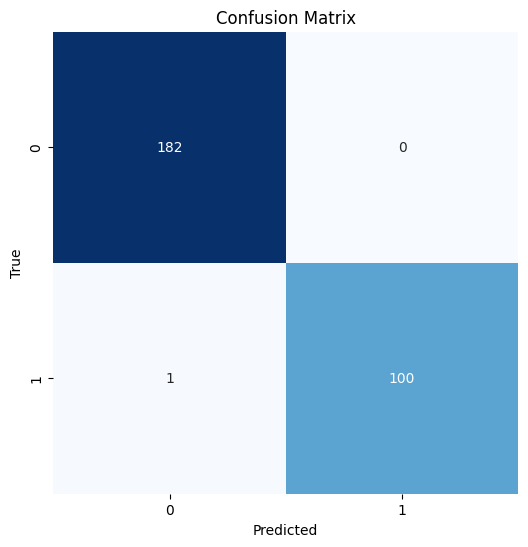

[[182   0]
 [  1 100]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       182
           1       1.00      0.99      1.00       101

    accuracy                           1.00       283
   macro avg       1.00      1.00      1.00       283
weighted avg       1.00      1.00      1.00       283



In [20]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Generate a classification report
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  